In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
print(os.listdir(".."))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv']
['input', 'config', 'lib', 'working']


In [2]:
# Reading the input Data
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [3]:
%%time
submission = pd.DataFrame(data = test['ID_code'], columns = ['ID_code'])

CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 22.7 ms


In [4]:
#Checking for NULL values
train.isnull().sum().sum()

0

In [5]:
# Removing the ID_code and target that is not needed for preprocessing.

train1 = train.drop(columns = ['ID_code','target'])
test1 = test.drop(columns = ['ID_code'])
colu = test1.columns

In [6]:
train1['target'] = train[['target']]

In [7]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

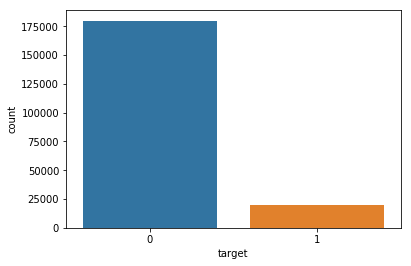

In [9]:
sns.countplot(train1['target'])
# In this we can see that the positive i.e 1 values are very less i.e means imbalance in data 

In [ ]:
feat = train

In [ ]:
# Used KFold to check the Score of the model for different combination of the test and training data

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
fold = KFold(n_splits = 10, shuffle = True, random_state = 1)
for tr, te in fold.split(train):
    #print(train_pca.iloc[tr]['target'])
    model = LogisticRegression(solver = 'lbfgs')
    model.fit(train1.iloc[tr][colu], train1.iloc[tr][['target']])
    print(model.score(train1.iloc[te][colu], train1.iloc[te][['target']]))

In [ ]:
# Model Prediction using the given test data set
submission['target'] = model.predict(test1)
submission.to_csv('submission_output.csv')